# The PQ-Solution

© Jürgen Kanz, February 2021, https://github.com/JuergenKanz/PQ-Solution

The P&Q problem was presented by Goldratt (1990). It aims to permit discussion - through a simple and easy example - of the differences between the assumptions made by the TOC - Theory of Constraints and other management approaches, especially those that use some form of cost allocation. In the present article, the goal is to make use of this example and of scenarios derived from it to discuss the feasibility of optimal solutions in light of the TOC. The Integer Linear Programming technique will be used here to provide optimal solutions to the problems suggested.

In this problem, a specific enterprise manufactures and sells two types of products, P and Q, and for that four resources are required: A, B, C and D. Sales prices, costs of raw materials - assumed here as the only TVC - and the demand for each product, as well as the unit processing time, in minutes, required for each resource are shown in the image.

These resources are paid to operate for 2400 minutes/week, and all the enterprise's costs and expenses, except for those associated with raw materials, correspond to $6000/week. The question is how many P and Q must be produced and sold so that the enterprise's profit is maximized. One can readily see that, in contrast to the other resources, resource B does not present enough capacity to meet the weekly P and Q demand. For this, 3000 minutes would be necessary, or 125 % of available capacity. It is necessary to decide on a product  mix that would maximize the profit of this enterprise.

-Image-
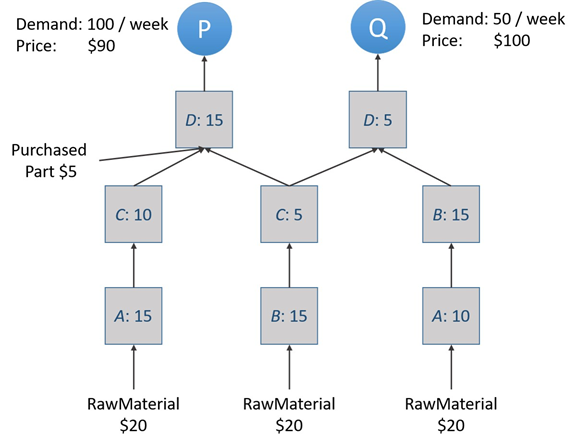

In [1]:
Import["PQ-Flow.jpg"]

The example is based on the book "The Haystack Syndrome" by Eliyahu M. Goldratt, North River Press Inc., 1990.

In [2]:
Clear["Global`*"]

# Variables

Xp is the amount produced and sold of product P, and Xq is the amount produced and sold of product Q.

In [3]:
var = {Xp, Xq};

## Parameter

### Sales Proce [$]

In [4]:
priceP = 90;
priceQ = 100;

### Raw Material [$]

In [6]:
rmP = 2*20 + 5;
rmQ = 2*20;

### Operational Expenditures [$]

In [8]:
oe=6000;

### Available time per resource [minutes / week]

In [9]:
avtime = 2400;

# Objective

The objective is to maximize the NP (net profit) [$] under given circumstances.

In [10]:
np = (Xp*(priceP - rmP) + Xq*(priceQ - rmQ)) - oe;

# Constraints

The constraints in this section are mathematical constraints at first. Especially physical constraints as known from the **TOC-Theory of Constraints** are often **Resource Constraints**. 

### Demand Constraints

In [11]:
dc1 = Xp <= 100;
dc2 = Xq <= 50;

### Non-Negativity Constraints

In [13]:
nnc1 = Xp >= 0;
nnc2 = Xq >= 0;

### Resource Constraints

In [15]:
rescA = 15*Xp + 10*Xq <= avtime;
rescB = 15*Xp + 30*Xq <= avtime;
rescC = 15*Xp + 5*Xq <= avtime;
rescD = 15*Xp + 5*Xq <= avtime;

## Do we have a TOC constraint?

In [19]:
If[(15*100 + 10*50) > avtime, 
 Text[Style["Resource A is a Constraint!", Red, 12]], 
 Text[Style["Resource A is not a Constraint!", Blue, 12]]]
If[(15*100 + 30*50) > avtime, 
 Text[Style["Resource B is a Constraint!", Red, 12]], 
 Text[Style["Resource B is not a Constraint!", Blue, 12]]]
If[(15*100 + 5*50) > avtime, 
 Text[Style["Resource C is a Constraint!", Red, 12]], 
 Text[Style["Resource C is not a Constraint!", Blue, 12]]]
If[(15*100 + 5*50) > avtime, 
 Text[Style["Resource D is a Constraint!", Red, 12]], 
 Text[Style["Resource D is not a Constraint!", Blue, 12]]]

Text[Resource A is not a Constraint!]
Text[Resource B is a Constraint!]
Text[Resource C is not a Constraint!]
Text[Resource D is not a Constraint!]

Resource B is a Constraint from a TOC perspective because we can not fulfill the market demand.

# Optimization

In [23]:
result = Maximize[{np, dc1, dc2, nnc1, nnc2, rescA, rescB, rescC, 
   rescD, var \[Element] Integers}, var]

{300, {Xp -> 100, Xq -> 30}}

In [24]:
maxNetProfit = result[[1]]

300

In [25]:
xp = Xp /. result[[2, 1]]

100

In [26]:
xq = Xq /. result[[2, 2]]

30

The achievable max net profit NP is $300. This is realized with 100 units of product P and 30 units of product Q.

# Graphical Solution

In [27]:
FeasibleRegion = 
  RegionPlot[
   nnc1 && nnc2 && dc1 && dc2 && rescA && rescB && rescC && 
    rescD, {Xp, 0, 100}, {Xq, 0, 50}];

-Graphics-
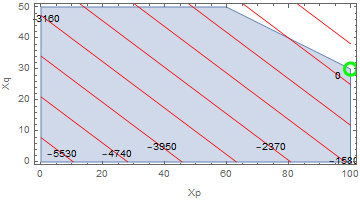

In [28]:
ObjectiveLines = 
  ContourPlot[np, {Xp, 0, 100}, {Xq, 0, 70}, Contours -> 10, 
   ContourStyle -> {Red}, ContourShading -> None, 
   ContourLabels -> True];
Objective = Graphics[{Thickness[0.01], Green, Circle[{xp, xq}, 2]}];
Show[FeasibleRegion, ObjectiveLines, Objective, 
 FrameLabel -> {"Xp", "Xq"}, AspectRatio -> Automatic]

* In Grey the region of feasible solutions.
* In Red lines of possible objectives.
* The Green circle marks the point of max Net Profit.